In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip list

In [20]:
!pip install opencv-python
!pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [87]:
import tensorflow as tf
import os

In [88]:
import cv2
import imghdr

In [89]:
data_dir = 'data' 

In [90]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [91]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [92]:
import numpy as np
from matplotlib import pyplot as plt

In [93]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 357 files belonging to 2 classes.


In [94]:
data_iterator = data.as_numpy_iterator()

In [95]:
batch = data_iterator.next()

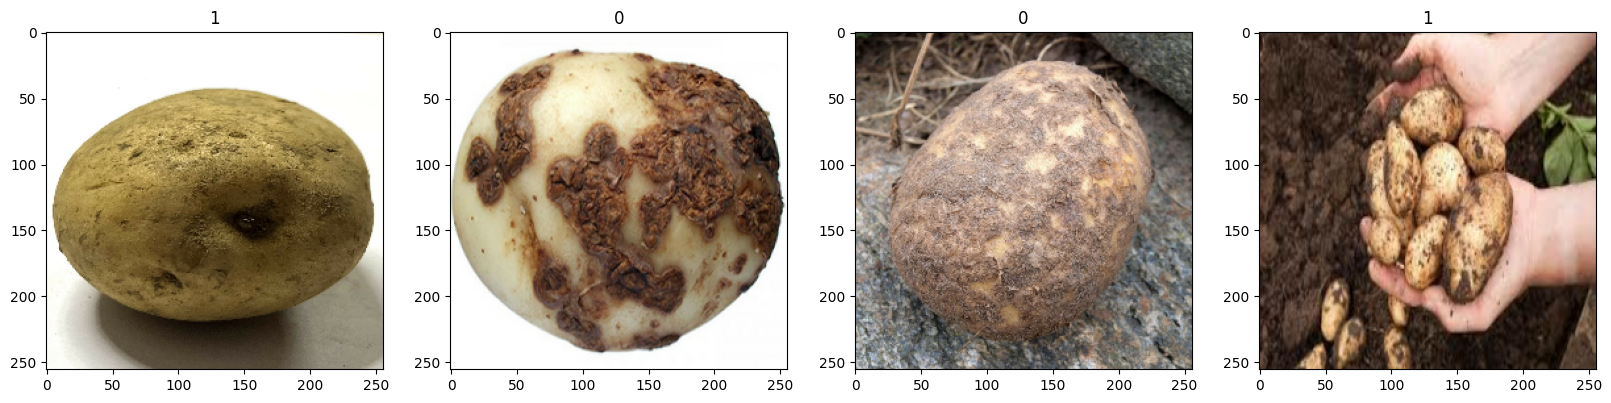

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [97]:
data = data.map(lambda x,y: (x/255, y))

In [98]:
data.as_numpy_iterator().next()

(array([[[[0.10588235, 0.10588235, 0.06666667],
          [0.10588235, 0.10588235, 0.06666667],
          [0.10588235, 0.10588235, 0.06666667],
          ...,
          [0.05490196, 0.0627451 , 0.05882353],
          [0.05490196, 0.0627451 , 0.05882353],
          [0.05119485, 0.05903799, 0.05511642]],
 
         [[0.09535235, 0.09535235, 0.05613667],
          [0.09736519, 0.09736519, 0.05814951],
          [0.09794743, 0.09794743, 0.05873174],
          ...,
          [0.07832414, 0.08616728, 0.08224571],
          [0.07832414, 0.08616728, 0.08224571],
          [0.07461704, 0.08246017, 0.0785386 ]],
 
         [[0.08929228, 0.08929228, 0.05007659],
          [0.093306  , 0.093306  , 0.05409031],
          [0.09619607, 0.09619607, 0.05698039],
          ...,
          [0.09175367, 0.09959681, 0.09567524],
          [0.09149816, 0.0993413 , 0.09541973],
          [0.08867439, 0.09651753, 0.09259596]],
 
         ...,
 
         [[0.20073542, 0.17328443, 0.14191188],
          [0.20295

In [99]:
len(data)

12

In [100]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [101]:
test_size+val_size+train_size

12

In [102]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [103]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [105]:
model = Sequential()

In [106]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [107]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [109]:
logdir='logs'

In [110]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [111]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
8/8 [==============================] - 5s 502ms/step - loss: 0.8636 - accuracy: 0.6172 - val_loss: 0.6411 - val_accuracy: 0.7188
Epoch 2/50
8/8 [==============================] - 4s 478ms/step - loss: 0.6408 - accuracy: 0.6562 - val_loss: 0.6924 - val_accuracy: 0.5312
Epoch 3/50
8/8 [==============================] - 4s 453ms/step - loss: 0.6243 - accuracy: 0.6836 - val_loss: 0.5296 - val_accuracy: 0.7656
Epoch 4/50
8/8 [==============================] - 4s 449ms/step - loss: 0.6014 - accuracy: 0.6562 - val_loss: 0.5632 - val_accuracy: 0.7969
Epoch 5/50
8/8 [==============================] - 4s 466ms/step - loss: 0.5362 - accuracy: 0.7383 - val_loss: 0.5274 - val_accuracy: 0.7188
Epoch 6/50
8/8 [==============================] - 4s 466ms/step - loss: 0.4542 - accuracy: 0.7891 - val_loss: 0.4933 - val_accuracy: 0.7812
Epoch 7/50
8/8 [==============================] - 4s 451ms/step - loss: 0.4599 - accuracy: 0.7656 - val_loss: 0.4622 - val_accuracy: 0.7500
Epoch 8/50
8/8 [====

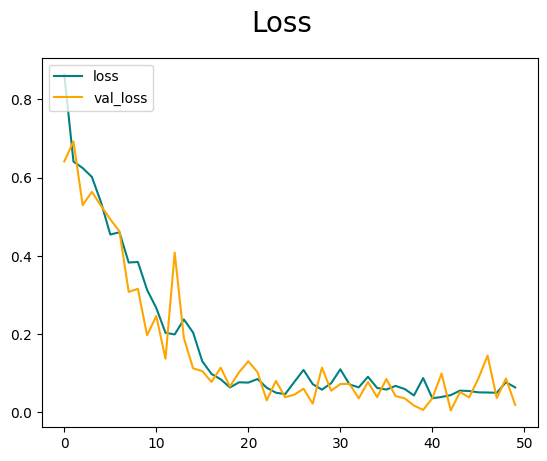

In [112]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

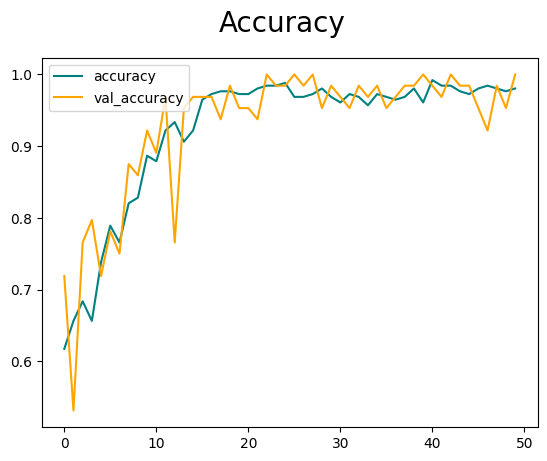

In [113]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [114]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [115]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [116]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 56ms/step


In [117]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.95454544, shape=(), dtype=float32) tf.Tensor(0.972973, shape=(), dtype=float32)


In [118]:
import cv2

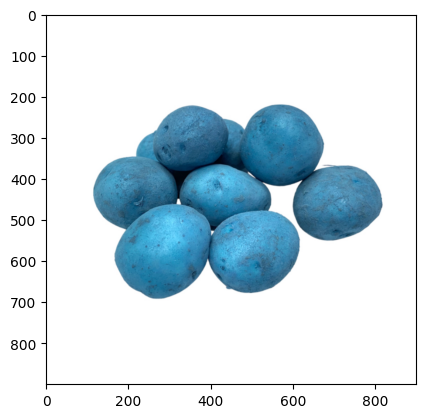

In [171]:
img = cv2.imread('patatas.jpg')
plt.imshow(img)
plt.show()

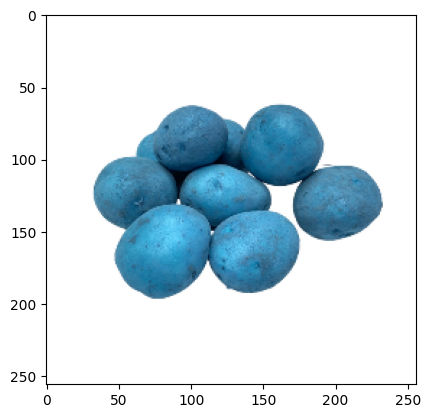

In [172]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [142]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [143]:
yhat

array([[0.130415]], dtype=float32)

In [144]:
if yhat > 0.5: 
    print(f'Predicted class is Healthy')
else:
    print(f'Predicted class is Diseased')

Predicted class is Diseased


In [41]:
from tensorflow.keras.models import load_model

In [134]:
model.save(os.path.join('models','50epochs.h5'))

D:\ImageClassification\potatoclassification\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [152]:
new_model = load_model(os.path.join('models','50epochs.h5'))

In [173]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [174]:
yhatnew

array([[0.27954075]], dtype=float32)

In [175]:
if yhatnew > 0.65: 
    print(f'Predicted class is Healthy')
    
elif 0.40 <= yhatnew <= 0.45:
    print(f'Predicted class is Diseased')    
else:
    print(f'nothing detected')

nothing detected


In [59]:
import cv2
import time
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import os

In [63]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

    # Converting into RGB
    frame_array = Image.fromarray(frame, 'RGB')

    # Resizing
    frame_array = frame_array.resize((255,255))
    frame_array = np.array(frame_array)

    # 4-Dimensional Tensor
    frame_array = np.expand_dims(frame_array, axis=0)
    
    prediction = new_model.predict(np.expand_dims(frame_array/255, 0))

 
    
    
    if prediction > 0.5:        
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle(((8, 50), (140, 100)), fill=(0, 0, 255))
        draw.text((10, 50), "ROTTEN", font=font, fill=(255, 255, 255))
        frame = np.array(img_pil)

        
    elif prediction < 0.5:       
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle(((8, 50), (110, 100)), fill="green")
        draw.text((10, 50), "FRESH", font=font, fill=(255, 255, 255))
        frame = np.array(img_pil)
        

    else:
        img_pil = Image.fromarray(frame)
        draw = ImageDraw.Draw(img_pil)
        draw.rectangle(((8, 50), (170, 100)), fill=(0,165,255))
        draw.text((10, 50), "NO FRUIT", font=font, fill=(255, 255, 255))
        frame = np.array(img_pil)
        
        
    # Show the frame
    cv2.imshow("Fresh & Rotten Fruit Detection", frame)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


cap.release()
cv2.destroyAllWindows()
    

AttributeError: 'NoneType' object has no attribute '__array_interface__'